<a href="https://colab.research.google.com/github/isaacfinberg/Novozymes-Enzyme-Stability-Prediction/blob/develop/Thermomut_10_25_Louis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  
!mkdir -p ~/.kaggle                                          
!cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log 
!chmod 600 ~/.kaggle/kaggle.json                            
!kaggle config set -n competition -v novozymes-enzyme-stability-prediction   
!kaggle competitions download -c novozymes-enzyme-stability-prediction         
!unzip -o *.zip >> log                                

- competition is now set to: novozymes-enzyme-stability-prediction
novozymes-enzyme-stability-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import pandas as pd


df_train = pd.read_csv("train.csv", index_col="seq_id")
df_train_updates = pd.read_csv("train_updates_20220929.csv", index_col="seq_id")

all_features_nan = df_train_updates.isnull().all("columns")

drop_indices = df_train_updates[all_features_nan].index
df_train = df_train.drop(index=drop_indices)

swap_ph_tm_indices = df_train_updates[~all_features_nan].index
df_train.loc[swap_ph_tm_indices, ["pH", "tm"]] = df_train_updates.loc[swap_ph_tm_indices, ["pH", "tm"]]

In [13]:
import json

with open('/content/gdrive/MyDrive/Kaggle/thermomutdb.json', 'r') as file:
  json_data = json.loads(file.read())

json_data[0]

{'DOI': '10.1093/oxfordjournals.jbchem.a132423',
 'weight': 28726.09,
 'blosum62': -1,
 'measure': 'CD',
 'pos': 0,
 'pdbs_template': None,
 'year': 1979,
 'protein': 'Tryptophan synthase alpha chain',
 'PDBs_template': None,
 'id': 1,
 'aro': 0,
 'PDB_wild': '1WQ5',
 'reference': 'J BIOCHEM 4, 915-21 (1979)',
 'ca_depth': 4.14,
 'mut_count': 0,
 'neg': -2,
 'pdb_mutant': None,
 'sul': 1,
 'relative_bfactor': 3.47,
 'mutation_type': 'Single',
 'source': 'Escherichia coli (strain K12)',
 'mutation_code': 'E49M',
 'swissprot': 'TRPA_ECOLI (P0A877)',
 'mutation_based': 'PDB and Uniprot',
 'ph': 7.0,
 'neu': -1,
 'ddg': 4.6,
 'method': 'GdnHCl',
 'phi': -118.5,
 'psi': 113.0,
 'sst': 'Strand',
 'rsa': 0.0,
 'effect': 'stabilizing',
 'mutated_chain': 'A',
 'res_depth': 3.53,
 'temperature': 298.95,
 'acc': -2,
 'don': 0,
 'dtm': None,
 'pam250': 0,
 'length': 268.0,
 'uniprot': 'P0A878',
 'PMID': '378988',
 'PIR_ID': 'TSECA'}

In [31]:
import requests

def get_sequence(uniprot_id):
  url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=false&format=json&query=' + uniprot_id
  uniprot_api_response = json.loads(requests.get(url).text)
  
  if 'results' not in uniprot_api_response:
    print(uniprot_api_response)
    return None
  
  if len(uniprot_api_response['results']) == 0:
    print(uniprot_api_response)
    return None
    

  return uniprot_api_response['results'][0]['sequence']['value']

get_sequence('P0A878')

'MERYESLFAQLKERKEGAFVPFVTLGDPGIEQSLKIIDTLIEAGADALELGIPFSDPLADGPTIQNATLRAFAAGVTPAQCFEMLALIRQKHPTIPIGLLMYANLVFNKGIDEFYAQCEKVGVDSVLVADVPVEESAPFRQAALRHNVAPIFICPPNADDDLLRQIASYGRGYTYLLSRAGVTGAENRAALPLNHLVAKLKEYNAAPPLQGFGISAPDQVKAAIDAGAAGAISGSAIVKIIEQHINEPEKMLAALKVFVQPMKAATRS'

In [32]:
i, total_elements = 0, len(json_data)
dataframe_lines = []
sequence_cache = {}

for json_element in json_data:

  if i % 10 == 0:
    print('%i of %i' % (i, total_elements))

  i += 1
  
  delta_tm = json_element['dtm']
  if delta_tm is None: continue

  pdb_id = json_element['PDB_wild']
  uniprot_id = json_element['uniprot']
  mutations = json_element['mutation_code']

  if uniprot_id in sequence_cache:
    sequence = sequence_cache[uniprot_id]
  else:
    sequence = get_sequence(uniprot_id)
    sequence_cache[uniprot_id] = sequence

  line = [pdb_id, uniprot_id, sequence, mutations, delta_tm]
  dataframe_lines.append(line)


0 of 13337
10 of 13337
20 of 13337
30 of 13337
40 of 13337
50 of 13337
60 of 13337
70 of 13337
80 of 13337
90 of 13337
100 of 13337
110 of 13337
120 of 13337
130 of 13337
140 of 13337
150 of 13337
160 of 13337
170 of 13337
180 of 13337
190 of 13337
200 of 13337
210 of 13337
220 of 13337
230 of 13337
240 of 13337
250 of 13337
260 of 13337
270 of 13337
280 of 13337
290 of 13337
300 of 13337
310 of 13337
320 of 13337
330 of 13337
340 of 13337
350 of 13337
360 of 13337
370 of 13337
380 of 13337
390 of 13337
400 of 13337
410 of 13337
420 of 13337
430 of 13337
440 of 13337
450 of 13337
460 of 13337
470 of 13337
480 of 13337
490 of 13337
500 of 13337
510 of 13337
520 of 13337
530 of 13337
540 of 13337
550 of 13337
560 of 13337
570 of 13337
580 of 13337
590 of 13337
600 of 13337
610 of 13337
620 of 13337
630 of 13337
640 of 13337
650 of 13337
660 of 13337
670 of 13337
680 of 13337
690 of 13337
700 of 13337
710 of 13337
720 of 13337
730 of 13337
{'url': 'http://rest.uniprot.org/uniprotkb/stream

In [116]:
import pandas as pd

df = pd.DataFrame(dataframe_lines, columns=['pdb_id', 'uniprot_id', 'wt_sequence', 'mutations', 'delta_tm'])
df

,pdb_id,uniprot_id,wt_sequence,mutations,delta_tm
0,2LZM,P00720,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,W138Y,-6.3
1,2LZM,P00720,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,"W138Y,W126Y,W158Y",-6.2
2,2LZM,P00720,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,"W138Y,W126Y,W158Y",-6.6
3,2LZM,P00720,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,E128A,0.6
4,2LZM,P00720,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,V131A,1.0
...,...,...,...,...,...
6102,1A5E,P03050,MKGMSKMPQFNLRWPREVLDLVRKVAEENGRSVNSEIYQRVMESFK...,L78G,0.9
6103,1A5E,P03050,MKGMSKMPQFNLRWPREVLDLVRKVAEENGRSVNSEIYQRVMESFK...,V95K,1.0
6104,1A5E,P03050,MKGMSKMPQFNLRWPREVLDLVRKVAEENGRSVNSEIYQRVMESFK...,W15D,2.2
6105,1A5E,P03050,MKGMSKMPQFNLRWPREVLDLVRKVAEENGRSVNSEIYQRVMESFK...,R124D,-0.4


In [117]:
import re

def insert_mutation(seq,mutation):

    if mutation is None:
      print('Mutation is None')
      return None
    
    matches = re.search('([A-Z])([0-9]+)([A-Z])', mutation)

    if matches is None:
      print('Matches are None')
      return None
    
    aa_from = matches[1]
    aa_to = matches[3]
    position = int(matches[2])

    if seq is None:
      print('Wildtype sequence is None')
      return None
    
    if len(seq) <= position-1:
      print('Wildtype sequence is too short')
      return None

    if seq[position-1] != aa_from:
      print('Mismatch between WT sequence and mutation at position %i: %s, %s' % (position, seq[position-1], aa_from))
      return None
    else:
      new_seq = seq[0:position-1] + aa_to + seq[position:]
      return new_seq

def insert_mutations(seq,mutations):
  for mutation in mutations.split(','):
    seq = insert_mutation(seq,mutation)

  return seq

seq = 'MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNCNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRCALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSIWYNQTPNRAKRVITTFRTGTWDAYKNL'
mutations = 'W138Y,W126Y,W158Y'

new_seq = insert_mutations(seq,mutations)
assert(new_seq[138-1] == 'Y')
assert(new_seq[126-1] == 'Y')
assert(new_seq[158-1] == 'Y')

In [119]:
mutated_sequence = df.apply(lambda row: insert_mutations(row['wt_sequence'], row['mutations']), axis=1)

df.insert(0,"mutated_sequence", mutated_sequence)

Mismatch between WT sequence and mutation at position 30: G, P
Mismatch between WT sequence and mutation at position 67: E, Y
Mismatch between WT sequence and mutation at position 30: G, P
Wildtype sequence is None
Mismatch between WT sequence and mutation at position 102: T, C
Mismatch between WT sequence and mutation at position 20: C, V
Mismatch between WT sequence and mutation at position 93: N, P
Mismatch between WT sequence and mutation at position 114: G, P
Mismatch between WT sequence and mutation at position 114: G, P
Mismatch between WT sequence and mutation at position 93: N, P
Wildtype sequence is None
Mismatch between WT sequence and mutation at position 93: N, P
Mismatch between WT sequence and mutation at position 111: T, R
Wildtype sequence is None
Mismatch between WT sequence and mutation at position 131: T, R
Mismatch between WT sequence and mutation at position 111: T, R
Mismatch between WT sequence and mutation at position 77: I, C
Mismatch between WT sequence and m

In [136]:
df = df.drop(columns=['uniprot_id'])

In [144]:
df = df.dropna()

In [145]:
import requests
from io import StringIO

def get_jinyuansun_data_v1():
  url = 'https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/v1/tm.csv'
  github_response = requests.get(url).text
  
  raw_df = pd.read_csv(StringIO('ID' + github_response))
  mutations = raw_df.apply(lambda row: row['WT'] + str(row['position']) + row['MUT'], axis=1)
  raw_df = raw_df.drop(columns=['ID', 'WT', 'position', 'MUT'])
  raw_df.insert(0, 'mutations', mutations)
  
  raw_df = raw_df.rename(columns={ 'PDB': 'pdb_id', 'sequence': 'wt_sequence', 'mutant_seq': 'mutated_sequence', 'dTm': 'delta_tm'})
  return raw_df

def get_jinyuansun_data_v2():
  url = 'https://raw.githubusercontent.com/JinyuanSun/mutation-stability-data/main/v2/train.csv'
  github_response = requests.get(url).text
  
  raw_df = pd.read_csv(StringIO(github_response))
  mutations = raw_df.apply(lambda row: row['wildtype'] + str(row['seq_index']) + row['mutation'], axis=1)
  raw_df.insert(0, 'mutations', mutations)
  raw_df = raw_df.drop(columns=['wildtype', 'pdb_resseq', 'seq_index', 'mutation', 'group'])
  raw_df = raw_df.rename(columns={ 'pdb': 'pdb_id', 'wt_seq': 'wt_sequence', 'mut_seq': 'mutated_sequence', 'ddG': 'delta_dg'})

  return raw_df

df1 = get_jinyuansun_data_v1()
#df2 = get_jinyuansun_data_v2()

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6128648/

df1

,mutations,pdb_id,delta_tm,wt_sequence,mutated_sequence
0,V245L,1CQW,2.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
1,L95V,1CQW,-0.4,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
2,C176F,1CQW,5.2,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
3,G171Q,1CQW,3.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
4,T148L,1CQW,1.1,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...,MSEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSY...
...,...,...,...,...,...
993,V442G,1CF3,2.0,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...
994,S444N,1CF3,3.0,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...
995,D473N,1CF3,4.0,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...
996,W138Y,2LZM,-6.3,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...


In [146]:
df_concat = pd.concat(([df, df1]))

df_concat

,mutated_sequence,pdb_id,wt_sequence,mutations,delta_tm
0,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,W138Y,-6.3
1,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,"W138Y,W126Y,W158Y",-6.2
2,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,"W138Y,W126Y,W158Y",-6.6
3,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,E128A,0.6
4,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,V131A,1.0
...,...,...,...,...,...
993,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,1CF3,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,V442G,2.0
994,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,1CF3,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,S444N,3.0
995,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,1CF3,MQTLLVSSLVVSLAAALPHYIRSNGIEASLLTDPKDVSGRTVDYII...,D473N,4.0
996,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,2LZM,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,W138Y,-6.3


In [147]:
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv')
ToCSV(df_concat, '/content/gdrive/My Drive/Kaggle/MutationsDeltaTM')

In [149]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer as SBERT
sbert = SBERT('paraphrase-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 5.3 MB 24.5 MB/s 
     |████████████████████████████████| 1.3 MB 72.3 MB/s 
     |████████████████████████████████| 163 kB 87.6 MB/s 
     |████████████████████████████████| 7.6 MB 75.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ac1f7b2a04a1dafd561effaf9d89560cde0f55b619babdf849b2be16b82ecbcf
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [310]:
import numpy as np

def get_sbert_embedding(sequence):
  encoded = np.zeros(4*384)
  for i in range(0, 4):
    seq_slice = sequence[i*100:i*100+100]
    encoded[i*384:i*384+384] = sbert.encode(seq_slice)
  return encoded

test = get_sbert_embedding(df_concat.wt_sequence.values[0])
test.shape

(1536,)

In [311]:
wt_sequence_embeddings = np.asarray([get_sbert_embedding(v) for v in df_concat.wt_sequence.values])
mutated_sequence_embeddings = np.asarray([get_sbert_embedding(v) for v in df_concat.mutated_sequence.values])

embeddings = np.hstack([wt_sequence_embeddings,mutated_sequence_embeddings])
delta_tms = df_concat.delta_tm.values

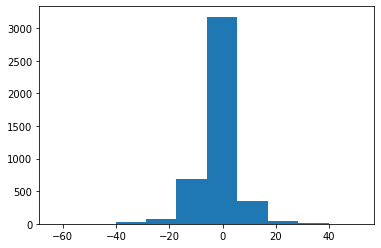

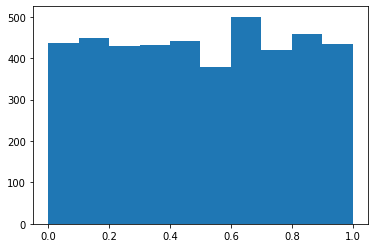

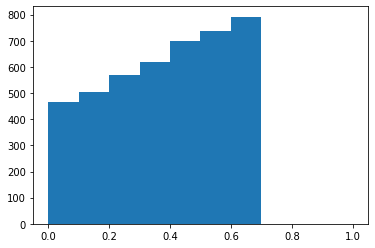

In [312]:
from sklearn.preprocessing import QuantileTransformer

plt.hist(delta_tms)
plt.show()

scaler = QuantileTransformer()

delta_tms_scaled = scaler.fit_transform(delta_tms.reshape(-1,1)).reshape(-1,1)

plt.hist(delta_tms_scaled)
plt.show()

delta_tms_scaled_log = np.log1p(delta_tms_scaled)

plt.hist(delta_tms_scaled_log, range=[0,1])
plt.show()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 3072)              0         
                                                                 
 dense_66 (Dense)            (None, 1024)              3146752   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_37 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_67 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 3,151,873
Trainable params: 3,149,825
Non-trainable params: 2,048
_______________________________________

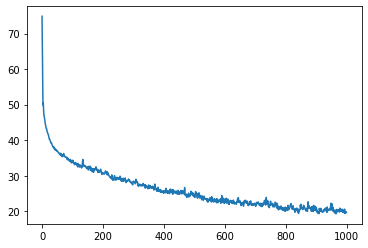

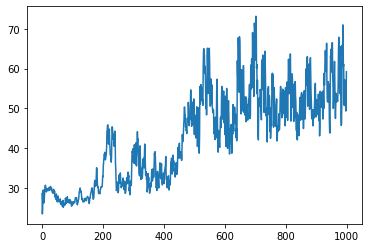

In [321]:
from sklearn.metrics import accuracy_score
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

X = embeddings
y = delta_tms

tf.random.set_seed(0)
GlorotInit = keras.initializers.GlorotNormal(seed=0)

m = keras.models.Sequential([
    Flatten(input_shape=[embeddings.shape[1]]),
    Dense(1024, activation="relu", kernel_initializer=GlorotInit),
    Dropout(0.05),
    BatchNormalization(),
    Dense(1, kernel_initializer=GlorotInit)
])

m.summary()

m.compile(loss="mse", optimizer="adam", metrics=['mse'])

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True,
)

hist = m.fit(X, y, 
             batch_size=2048, 
             epochs=1000, 
             validation_split=0.3, 
             #callbacks=[callback], 
             #verbose=False
)

plt.plot(hist.history['mse'])
plt.show()

plt.plot(hist.history['val_mse'])
plt.show()

In [270]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  
!mkdir -p ~/.kaggle                                          
!cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log 
!chmod 600 ~/.kaggle/kaggle.json                            
!kaggle config set -n competition -v novozymes-enzyme-stability-prediction   
!kaggle competitions download -c novozymes-enzyme-stability-prediction         
!unzip -o *.zip >> log

- competition is now set to: novozymes-enzyme-stability-prediction
novozymes-enzyme-stability-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [314]:
df_test = pd.read_csv('test.csv', low_memory=False); df_test

import numpy as np

wt = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'
encoded_wt = get_sbert_embedding(wt)

test_wt_sequence_embeddings = np.asarray([encoded_wt for x in range(0, len(df_test.protein_sequence.values))])
test_mutated_sequence_embeddings = np.asarray([ get_sbert_embedding(v) for v in df_test.protein_sequence.values])

test_embeddings = np.hstack([test_wt_sequence_embeddings,test_mutated_sequence_embeddings])

76/76 [==============================] - 0s 2ms/step


array([[0.2123923 ],
       [0.21500583],
       [0.2020938 ],
       ...,
       [0.21191537],
       [0.21549256],
       [0.21518898]], dtype=float32)

In [324]:
preds = m.predict(test_embeddings)
preds

#test_delta_tms = scaler.inverse_transform(preds)
#test_delta_tms = np.expm1(test_delta_tms)
#test_delta_tms

76/76 [==============================] - 0s 2ms/step


array([[-7.0689063],
       [-7.20563  ],
       [-4.373531 ],
       ...,
       [-7.1798196],
       [-7.3813457],
       [-7.2539144]], dtype=float32)

In [326]:
test_tms = preds + 38.1
test_tms

array([[31.031092],
       [30.89437 ],
       [33.726467],
       ...,
       [30.92018 ],
       [30.718653],
       [30.846085]], dtype=float32)

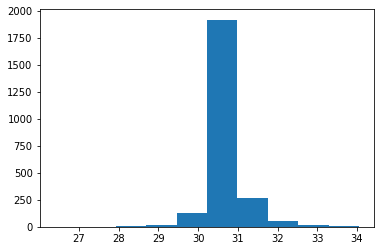

In [327]:
np.unique(test_tms)
plt.hist(test_tms)
plt.show()

In [328]:
pY = pd.DataFrame(test_tms, index=range(31390,len(test_tms)+31390), columns=['tm'])

ToCSV = lambda df_tmp, fname: df_tmp.round(5).to_csv(f'{fname}.csv', index_label='seq_id')
ToCSV(pY, '/content/gdrive/MyDrive/Kaggle/Novozymes_Submission')